In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import plotly.plotly as py
import plotly.figure_factory as ff

In [3]:
DATA = os.path.join('.','gg_survey_res.csv')

In [63]:
data = pd.read_csv(DATA)

In [64]:
data.head()

,time,location,location_encoded,app_num,app_num_encoded,phone_num,phone_num_encoded,onsite_num,onsite_num_encoded,offer_num,...,job_type,job_dev,job_mkt,job_fin,job_eng,job_sci,job_cons,job_acct,job_data,job_other
0,11/27/2018 21:20:39,The US,US,500,500.0,15,15,1,1.0,NaN,...,Software Development,1,0,0,0,0,0,0,0,0
1,11/27/2018 22:35:42,Canada,O,2,2.0,2,2,1,1.0,NaN,...,Software Development,1,0,0,0,0,0,0,0,0
2,11/28/2018 13:32:27,The US,US,More than 100 applications,100.0,2,2,1,1.0,NaN,...,Software Development,1,0,0,0,0,0,0,0,0
3,11/29/2018 5:42:19,"The US, The UK",M,120,120.0,18,18,3,3.0,NaN,...,Marketing,0,1,0,0,0,0,0,0,0
4,11/29/2018 12:53:20,The US,US,80,80.0,20,20,10,10.0,2,...,Finance (Tài chính),0,0,1,0,0,0,0,0,0


In [65]:
data.shape

(74, 26)

In [66]:
data['app_num_encoded'].replace('', np.nan, inplace=True)
data.dropna(subset=['app_num_encoded'], inplace=True)
data.shape

(65, 26)

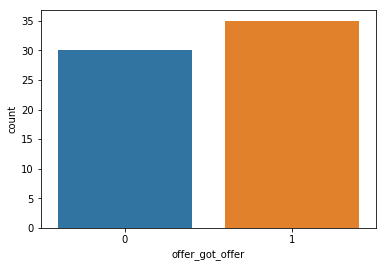

In [38]:
sns.countplot(data['offer_got_offer'])

In [33]:
looking = data[data['offer_got_offer']==False]
got_offer = data[data['offer_got_offer']==True]

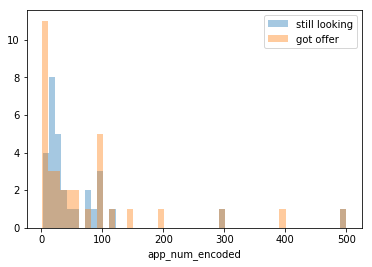

In [36]:
plt.figure('Number of applications')
ax1 = sns.distplot(looking['app_num_encoded'], bins=50, kde=False, label='still looking')
ax2 = sns.distplot(got_offer['app_num_encoded'], bins=50, kde=False, label = 'got offer')
plt.legend()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

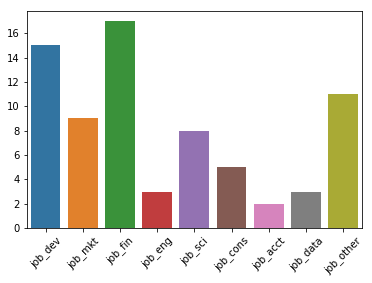

In [51]:
job_type = data[['job_dev','job_mkt','job_fin', 'job_eng','job_sci','job_cons','job_acct','job_data','job_other']].sum()

ax = sns.barplot(x=job_type.index, y=job_type.values)
plt.xticks(rotation=45)

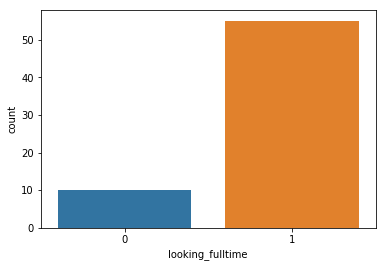

In [60]:
sns.countplot(data['looking_fulltime'])

In [58]:
intern = data[data['looking_fulltime']==0]
ft = data[data['looking_fulltime']==1]

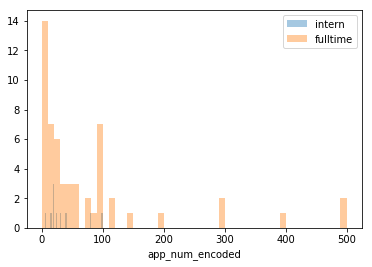

In [62]:
ax1 = sns.distplot(intern['app_num_encoded'], bins=50, kde=False, label='intern')
ax2 = sns.distplot(ft['app_num_encoded'], bins=50, kde=False, label = 'fulltime')
plt.legend()

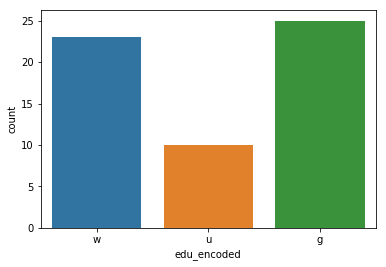

In [67]:
sns.countplot(data['edu_encoded'])

/Users/pnguyen/.pyenv/versions/anaconda3-5.2.0/envs/davinci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



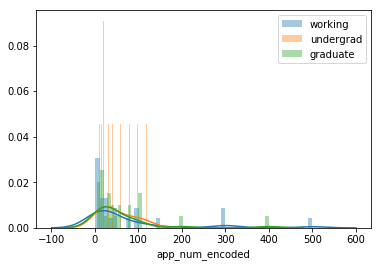

In [71]:
KDE=True
working = data[data['edu_encoded']=='w']
grad = data[data['edu_encoded']=='g']
ug = data[data['edu_encoded']=='u']
ax1 = sns.distplot(working['app_num_encoded'], bins=50, kde=KDE, label='working')
ax2 = sns.distplot(ug['app_num_encoded'], bins=50, kde=KDE, label='undergrad')
ax3 = sns.distplot(grad['app_num_encoded'], bins=50, kde=KDE, label='graduate')
plt.legend()

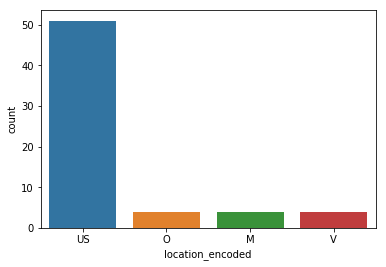

In [72]:
sns.countplot(data['location_encoded'])

/Users/pnguyen/.pyenv/versions/anaconda3-5.2.0/envs/davinci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



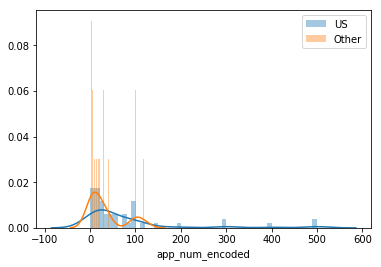

In [76]:
KDE=1
us = data[data['location_encoded']=='US']
other = data[data['location_encoded']!='US']
ax1 = sns.distplot(us['app_num_encoded'], bins=50, kde=KDE, label='US')
ax2 = sns.distplot(other['app_num_encoded'], bins=50, kde=KDE, label='Other')
plt.legend()

In [80]:
data.groupby('job_dev')['app_num_encoded'].median()

job_dev
0    32.5
1    20.0
Name: app_num_encoded, dtype: float64

In [81]:
data.groupby('job_fin')['app_num_encoded'].median()

job_fin
0    30.0
1    40.0
Name: app_num_encoded, dtype: float64